<a href="https://colab.research.google.com/github/jstangelbellarmine/GaiaEye/blob/main/Gaia_Eye_Train_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connects to Google, unzips test/train data, and installs Ultralytics to help with YOLO.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!unzip -n "/content/drive/MyDrive/GaiaEye.zip" -d "/content/"

!pip install ultralytics --quiet



Mounted at /content/drive
Archive:  /content/drive/MyDrive/GaiaEye.zip
   creating: /content/GaiaEye/
  inflating: /content/GaiaEye/DesignArtifacts.html  
   creating: /content/GaiaEye/img/
  inflating: /content/GaiaEye/img/aag.png  
  inflating: /content/GaiaEye/img/buckthorn.jpg  
  inflating: /content/GaiaEye/img/burnpile.png  
  inflating: /content/GaiaEye/img/dronecanopy.png  
  inflating: /content/GaiaEye/img/droneoveroak.webp  
  inflating: /content/GaiaEye/img/fire.jpg  
  inflating: /content/GaiaEye/img/honeysuckle.jpg  
  inflating: /content/GaiaEye/img/map.png  
  inflating: /content/GaiaEye/img/tree-of-heaven.jpg  
  inflating: /content/GaiaEye/LandingPage.html  
  inflating: /content/GaiaEye/New Text Document.txt  
  inflating: /content/GaiaEye/script.js  
  inflating: /content/GaiaEye/styles.css  
   creating: /content/GaiaEye/yolo/
  inflating: /content/GaiaEye/yolo/classes.txt  
   creating: /content/GaiaEye/yolo/data/
   creating: /content/GaiaEye/yolo/data/train/
   c

pathing issue, create a [yaml](https://www.geeksforgeeks.org/reading-and-writing-yaml-file-in-python/) file.

In [2]:
import yaml

yaml_path = "/content/GaiaEye/yolo/data.yaml"

with open(yaml_path, "r") as file:
    data_config = yaml.safe_load(file)

data_config["path"] = "/content/GaiaEye/yolo/data"
data_config["train"] = "train/images"
data_config["val"] = "validation/images"

with open(yaml_path, "w") as file:
    yaml.dump(data_config, file)

print("✅ data.yaml paths fixed for Colab.")


✅ data.yaml paths fixed for Colab.


Minimum Model Train

In [3]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data="/content/GaiaEye/yolo/data.yaml", epochs=10, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 317MB/s]

Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/GaiaEye/yolo/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fal

100%|██████████| 755k/755k [00:00<00:00, 85.9MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 310MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.1±0.3 ms, read: 92.3±51.3 MB/s, size: 1451.1 KB)


train: Scanning /content/GaiaEye/yolo/data/train/labels... 137 images, 0 backgrounds, 0 corrupt: 100%|██████████| 137/137 [00:00<00:00, 389.17it/s]

train: New cache created: /content/GaiaEye/yolo/data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 87.2±29.0 MB/s, size: 755.7 KB)


val: Scanning /content/GaiaEye/yolo/data/validation/labels... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<00:00, 305.50it/s]

val: New cache created: /content/GaiaEye/yolo/data/validation/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.12G      1.667      2.961      1.798         74        640: 100%|██████████| 9/9 [00:06<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all         34        279     0.0243      0.889      0.259      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       2.6G      1.553      1.987      1.633        104        640: 100%|██████████| 9/9 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         34        279      0.952      0.143      0.338      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.63G      1.545      1.695      1.612         50        640: 100%|██████████| 9/9 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         34        279      0.811      0.136      0.338      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.63G      1.531      1.627      1.569         67        640: 100%|██████████| 9/9 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         34        279      0.778      0.188      0.383      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.64G      1.515      1.512      1.527         70        640: 100%|██████████| 9/9 [00:02<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         34        279       0.67      0.215      0.394      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.64G      1.491       1.45      1.516         95        640: 100%|██████████| 9/9 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]

                   all         34        279      0.682      0.277      0.381      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.64G      1.547      1.436      1.535        122        640: 100%|██████████| 9/9 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         34        279       0.59      0.305      0.378      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.64G      1.477      1.428      1.512         45        640: 100%|██████████| 9/9 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         34        279      0.644      0.419      0.511        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.64G      1.457       1.32      1.463         88        640: 100%|██████████| 9/9 [00:02<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         34        279       0.65      0.393      0.509      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.64G      1.427      1.287      1.443         95        640: 100%|██████████| 9/9 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         34        279      0.593      0.455      0.536      0.314



10 epochs completed in 0.011 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]


                   all         34        279      0.593      0.455      0.536      0.315
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dcd93c83fd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Optimized Yolo Model

In [4]:
!pip install ultralytics --quiet

!yolo train model=/content/GaiaEye/yolo/yolo11s.pt \
  data=/content/GaiaEye/yolo/data.yaml \
  epochs=100 imgsz=640 batch=32 \
  lr0=0.01 lrf=0.002 momentum=0.937 \
  warmup_epochs=5 warmup_momentum=0.8 warmup_bias_lr=0.1 \
  amp=True \
  hsv_h=0.015 hsv_s=0.7 hsv_v=0.4 \
  degrees=10 translate=0.2 scale=0.5 shear=2.0 perspective=0.0005 \
  flipud=0.5 fliplr=0.5 mosaic=1.0 mixup=0.1 \
  copy_paste=0.1 auto_augment=randaugment \
  weight_decay=0.0005 dropout=0.1

Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/GaiaEye/yolo/yolo11s.pt, data=/content/GaiaEye/yolo/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

analyzes model results

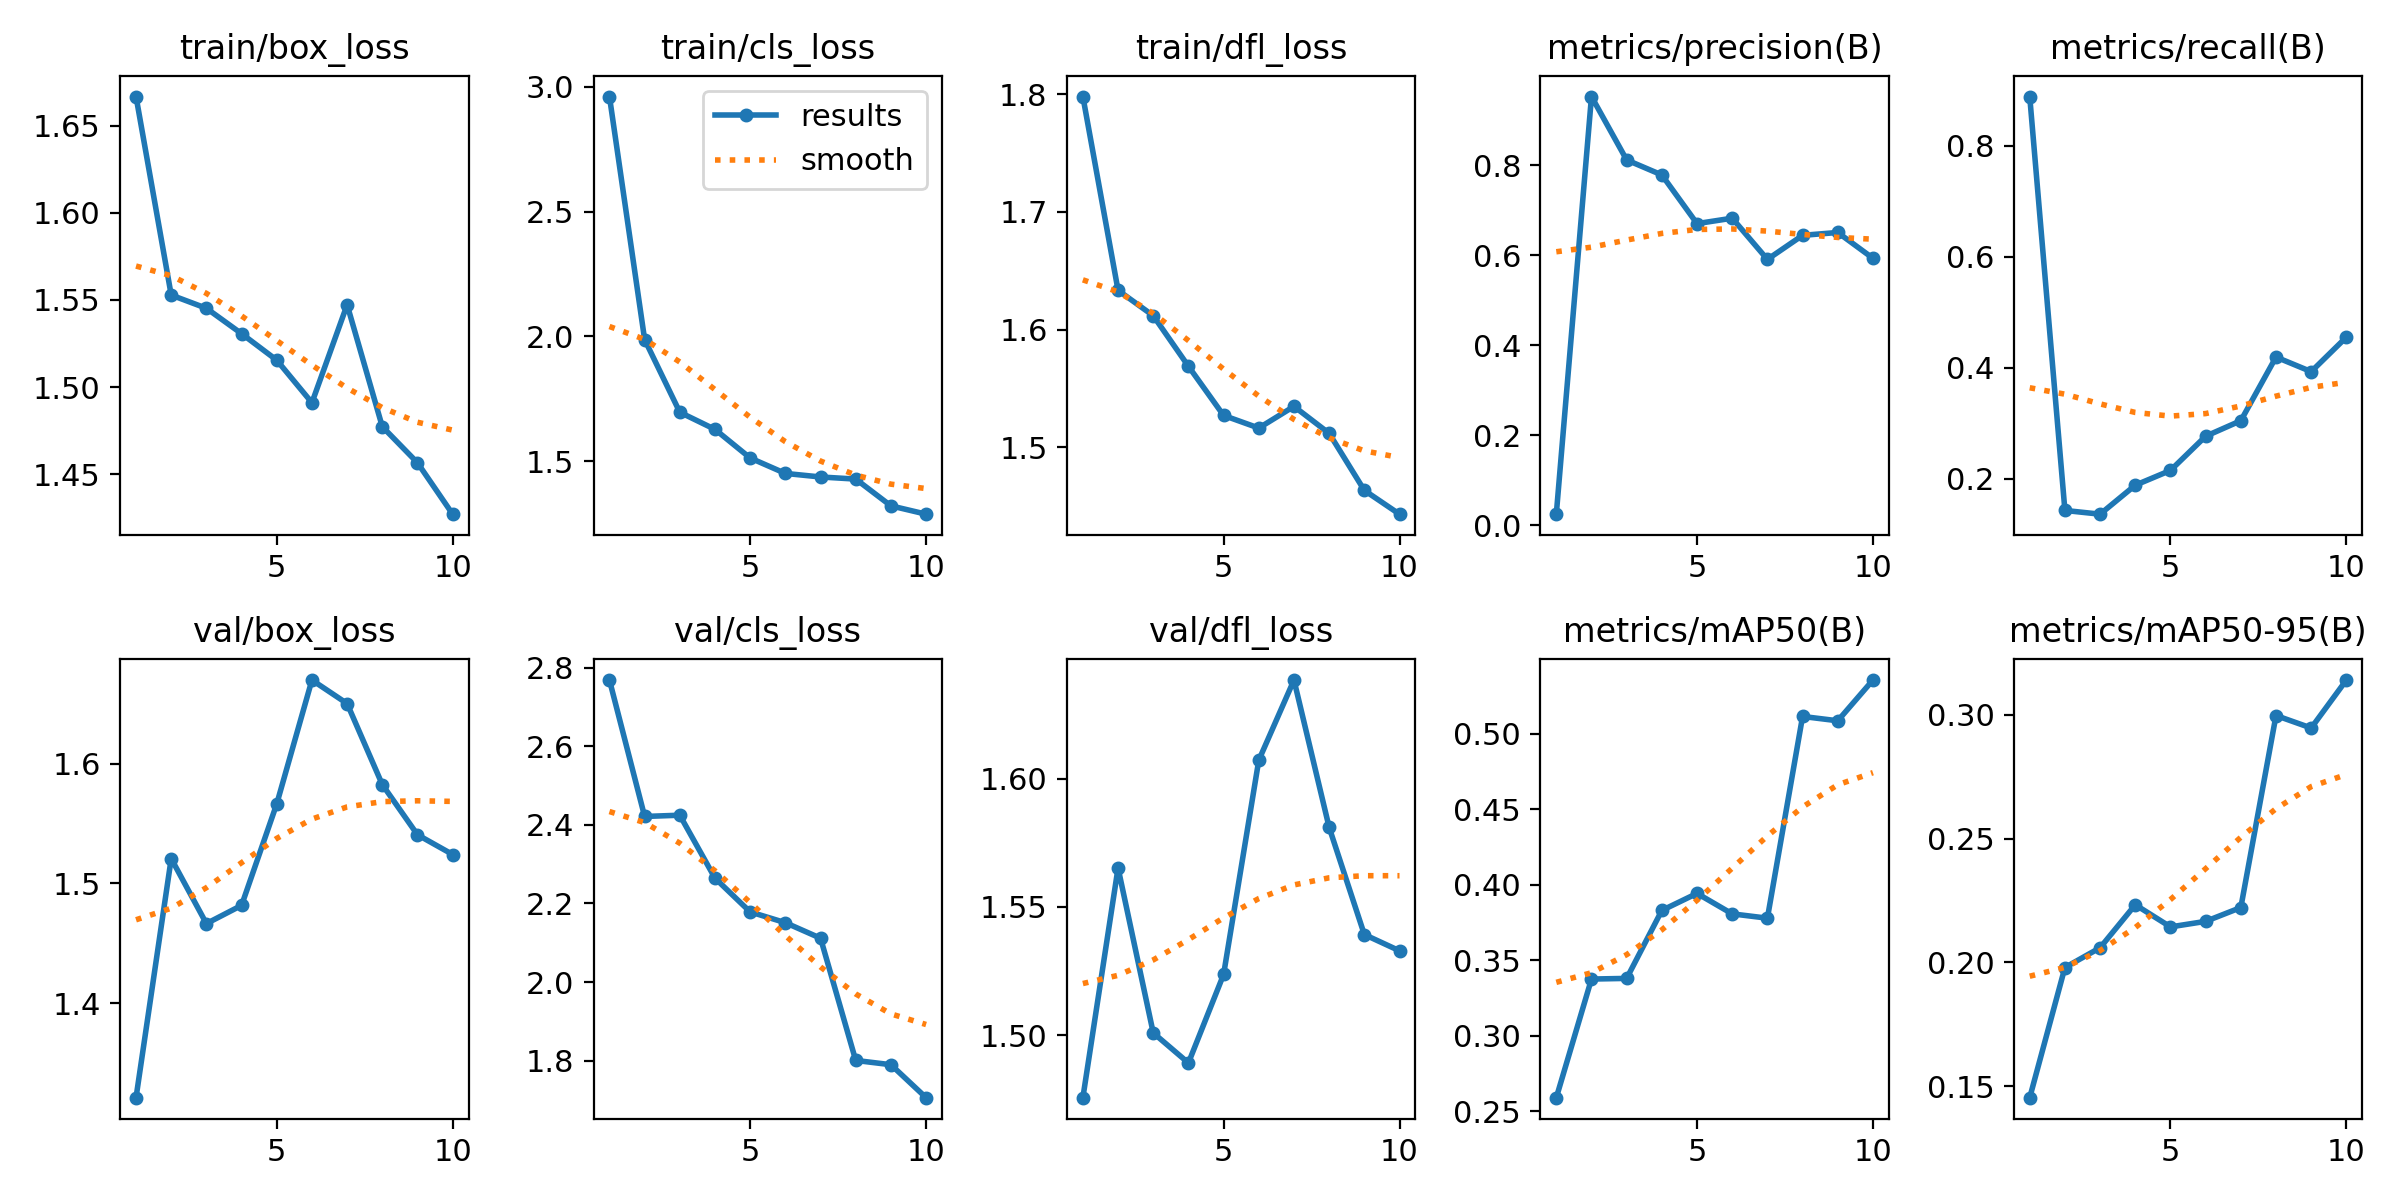

In [11]:
from IPython.display import Image
Image(filename='/content/runs/detect/train/results.png')

This section saves the model to my drive

In [12]:
import shutil
shutil.copy('/content/runs/detect/train2/weights/best.pt', '/content/drive/MyDrive/best.pt')

'/content/drive/MyDrive/best.pt'

this next section will be a highly-customzied, highly-augmented model.

In [13]:
from ultralytics import YOLO
model = YOLO('yolov8x.pt')

Implements best model

In [14]:
#model.train(
#    data='/content/GaiaEye/yolo/data.yaml',
#    epochs=300,
#    imgsz=1280,  # High-res input
#    batch=16,
#    device=0,  # GPU
#    name='train_yolov8x_custom',
#    mosaic=1.0,  # full-strength mosaic
#    mixup=0.5,
#    hsv_h=0.05,
#    hsv_s=0.9,
#    hsv_v=0.6,
#    degrees=20,
#    translate=0.4,
#    scale=0.7,
#    shear=5.0,
#    perspective=0.001,
#    fliplr=0.7,
#    flipud=0.4,
#    auto_augment='randaugment',
#    dropout=0.3,
#    patience=100,
#    pretrained=True,
#    save=True,
#    save_period=1
#)

This section will be used to show images in the future.

In [15]:
#from IPython.display import Image
#Image(filename='runs/detect/train_yolov8x_custom/results.png')